In [27]:
# 📦 Librairies
import pandas as pd
import numpy as np

# 📍 Chargement du fichier CSV
df = pd.read_csv(r'C:\Users\Acer\Downloads\MOCK_DATA_FINAL_COMPLET.csv')

# 🔍 Aperçu
print("✅ Dimensions :", df.shape)
df.head()


✅ Dimensions : (1000, 19)


,id_et,date_preinscrits,date_convocation,date_entretien,date_resultat,date_enreg,date_ne,score_final,moy_bac_et,resultat,id_concours,sexe,Note_Maths,Note_Physique,Note_Info,Score_Anglais,Bac_Type,Activite_Extra,Interet_IA
0,1,04/04/2023,31/07/2023,02/08/2023,14/09/2023,14/09/2023,23/12/1999,44.52,12.09,Rejected,4,garcon,13.75,10.22,8.93,83.64,Technique,Club Robotique,0
1,2,24/06/2023,16/07/2023,02/08/2023,11/09/2023,14/09/2023,07/07/2000,27.60,17.74,Rejected,4,garcon,19.51,14.50,8.70,89.83,Sciences,Debat,0
2,3,30/07/2023,09/08/2023,12/09/2023,14/09/2023,06/05/2024,02/04/2003,46.64,18.63,Rejected,2,fille,17.32,18.48,18.59,62.52,Lettres,Club Robotique,1
3,4,29/07/2023,26/08/2023,31/08/2023,14/09/2023,07/01/2024,05/05/2001,57.57,9.69,Waiting List,3,garcon,15.99,16.79,8.74,81.24,Sciences,Hackathon IA,1
4,5,29/07/2023,14/08/2023,17/08/2023,01/09/2023,14/09/2023,13/02/2001,33.85,6.46,Rejected,3,garcon,11.56,17.68,9.08,78.59,Economie,Club Robotique,0


In [28]:
# 🎯 Colonnes à utiliser comme features
features = [
    'Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais',
    'Bac_Type', 'Activite_Extra', 'Interet_IA'
]

# 🏁 Variable cible : score final à prédire
target = 'score_final'

# 🧼 Nettoyage : supprimer les lignes incomplètes
df_clean = df[features + [target]].dropna()

print("✅ Données nettoyées :", df_clean.shape)
df_clean.head()


✅ Données nettoyées : (1000, 8)


,Note_Maths,Note_Physique,Note_Info,Score_Anglais,Bac_Type,Activite_Extra,Interet_IA,score_final
0,13.75,10.22,8.93,83.64,Technique,Club Robotique,0,44.52
1,19.51,14.50,8.70,89.83,Sciences,Debat,0,27.60
2,17.32,18.48,18.59,62.52,Lettres,Club Robotique,1,46.64
3,15.99,16.79,8.74,81.24,Sciences,Hackathon IA,1,57.57
4,11.56,17.68,9.08,78.59,Economie,Club Robotique,0,33.85


In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 🧠 One-Hot Encoding pour les colonnes catégorielles
df_encoded = pd.get_dummies(df_clean, columns=['Bac_Type', 'Activite_Extra'])

# 🔢 Normalisation des colonnes numériques
numerical_cols = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 🎯 X = toutes les features sauf la cible
X = df_encoded.drop(columns=[target])

# 🔁 Transformation logarithmique de la cible
y = np.log1p(df_encoded[target])  # log(score_final + 1)

print("✅ Données prêtes avec cible transformée (log)")
X.head()


✅ Données prêtes avec cible transformée (log)


,Note_Maths,Note_Physique,Note_Info,Score_Anglais,Interet_IA,Bac_Type_Economie,Bac_Type_Lettres,Bac_Type_Sciences,Bac_Type_Technique,Activite_Extra_Aucune,Activite_Extra_Club Robotique,Activite_Extra_Club Sportif,Activite_Extra_Debat,Activite_Extra_Hackathon IA
0,0.371859,0.182427,0.262525,0.672873,0,False,False,False,True,False,True,False,False,False
1,0.950754,0.540586,0.247161,0.796797,0,False,False,True,False,False,False,False,True,False
2,0.730653,0.873640,0.907816,0.250050,1,False,True,False,False,False,True,False,False,False
3,0.596985,0.732218,0.249833,0.624825,1,False,False,True,False,False,False,False,False,True
4,0.151759,0.806695,0.272545,0.571772,0,True,False,False,False,False,True,False,False,False


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 📊 Séparation Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Entraînement
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🧪 Prédictions
y_pred = rf.predict(X_test)

# 📈 Évaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE : {mae:.2f}")
print(f"✅ R² : {r2:.2%}")


✅ MAE : 0.65
✅ R² : -11.80%


In [20]:
# Remplir les valeurs manquantes (par exemple, en utilisant la moyenne ou la médiane pour les variables numériques)
df_encoded.fillna(df_encoded.mean(), inplace=True)

# Vérifiez les valeurs manquantes
print(df_encoded.isnull().sum())


FK_Etudiant                    0
Age                            0
resultat_LISTE ATTENTE         0
resultat_REFUSE                0
moy_bac_et_10,04               0
                              ..
Lieu_Naissance_Zhongchuan      0
Lieu_Naissance_Zéramdine       0
Lieu_Naissance_Évry            0
Lieu_Naissance_Šilherovice     0
Lieu_Naissance_Šuto orizare    0
Length: 4661, dtype: int64


In [12]:
# 📦 Installer si nécessaire : pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"✅ [XGBoost] MAE : {mae_xgb:.2f}")
print(f"✅ [XGBoost] R² : {r2_xgb:.2%}")


✅ [XGBoost] MAE : 21.09
✅ [XGBoost] R² : -7.71%


C:\Users\Acer\AppData\Local\Temp\ipykernel_10288\356204232.py:13: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\smartadmit-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


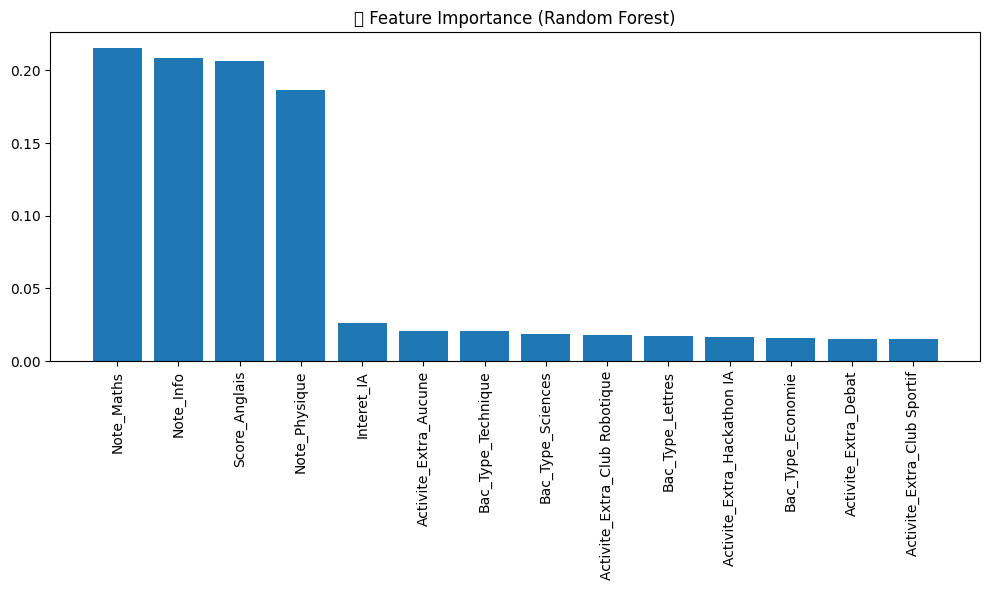

In [13]:
import matplotlib.pyplot as plt

# 📊 Feature importance
importances = rf.feature_importances_
features_names = X.columns
indices = np.argsort(importances)[::-1]

# 🖼️ Affichage
plt.figure(figsize=(10,6))
plt.title("🎯 Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [features_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



🚀 Entraînement : RandomForest
✅ MAE : 0.86
✅ R² : -2.61%

🚀 Entraînement : XGBoost
✅ MAE : 0.87
✅ R² : -8.91%

🚀 Entraînement : CatBoost
✅ MAE : 0.89
✅ R² : -13.39%

🚀 Entraînement : GradientBoosting
✅ MAE : 0.87
✅ R² : -7.93%

📊 Résultats finaux :
RandomForest: MAE = 0.86, R² = -2.61%
XGBoost: MAE = 0.87, R² = -8.91%
CatBoost: MAE = 0.89, R² = -13.39%
GradientBoosting: MAE = 0.87, R² = -7.93%

🚀 Entraînement du modèle Stacking...
✅ [Stacking] MAE : 0.89
✅ [Stacking] R² : -11.68%


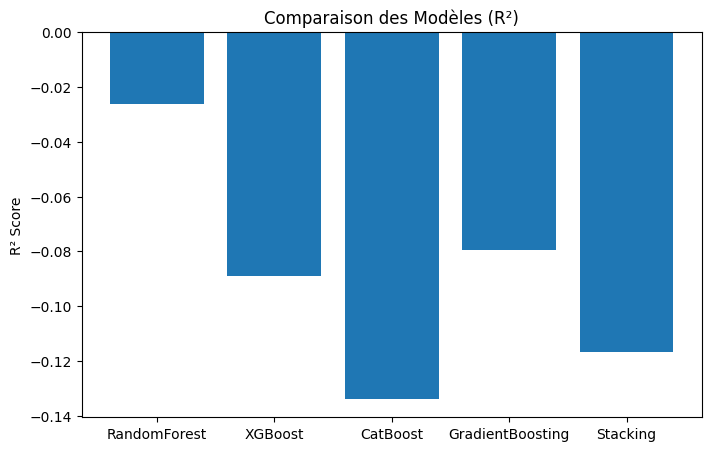

In [1]:
# 📦 Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 📍 Chargement des données
df = pd.read_csv(r'C:\Users\Acer\Downloads\MOCK_DATA_FINAL_COMPLET.csv')

# 🎯 Features et Target
features = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais',
            'Bac_Type', 'Activite_Extra', 'Interet_IA']
target = 'score_final'

df_clean = df[features + [target]].dropna()

# 📊 Feature Engineering
df_clean['Interaction_Maths_Physique'] = df_clean['Note_Maths'] * df_clean['Note_Physique']
df_clean['Score_Global'] = (df_clean['Note_Maths'] + df_clean['Note_Physique'] + 
                            df_clean['Note_Info'] + df_clean['Score_Anglais']) / 4

# 🧠 Encodage One-Hot
df_encoded = pd.get_dummies(df_clean, columns=['Bac_Type', 'Activite_Extra'])

# 🔢 Normalisation
numerical_cols = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais',
                  'Interaction_Maths_Physique', 'Score_Global']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# 🎯 Données finales
X = df_encoded.drop(columns=[target])
y_raw = df_encoded[target]

# 🔁 Transformation de la cible (Box-Cox)
pt = PowerTransformer(method='box-cox')
y = pt.fit_transform(y_raw.values.reshape(-1, 1)).flatten()

# 📊 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📚 Modèles
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🚀 Entraînement : {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "R2": r2}

    print(f"✅ MAE : {mae:.2f}")
    print(f"✅ R² : {r2:.2%}")

# 📈 Comparaison
print("\n📊 Résultats finaux :")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, R² = {metrics['R2']:.2%}")

# 📌 Stacking Final
estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0)),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
]
stack = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))

print("\n🚀 Entraînement du modèle Stacking...")
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"✅ [Stacking] MAE : {mae_stack:.2f}")
print(f"✅ [Stacking] R² : {r2_stack:.2%}")

# 📊 Affichage graphique
results['Stacking'] = {"MAE": mae_stack, "R2": r2_stack}

plt.figure(figsize=(8,5))
plt.bar(results.keys(), [v['R2'] for v in results.values()])
plt.title("Comparaison des Modèles (R²)")
plt.ylabel("R² Score")
plt.show()


C:\Users\Acer\venv_ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


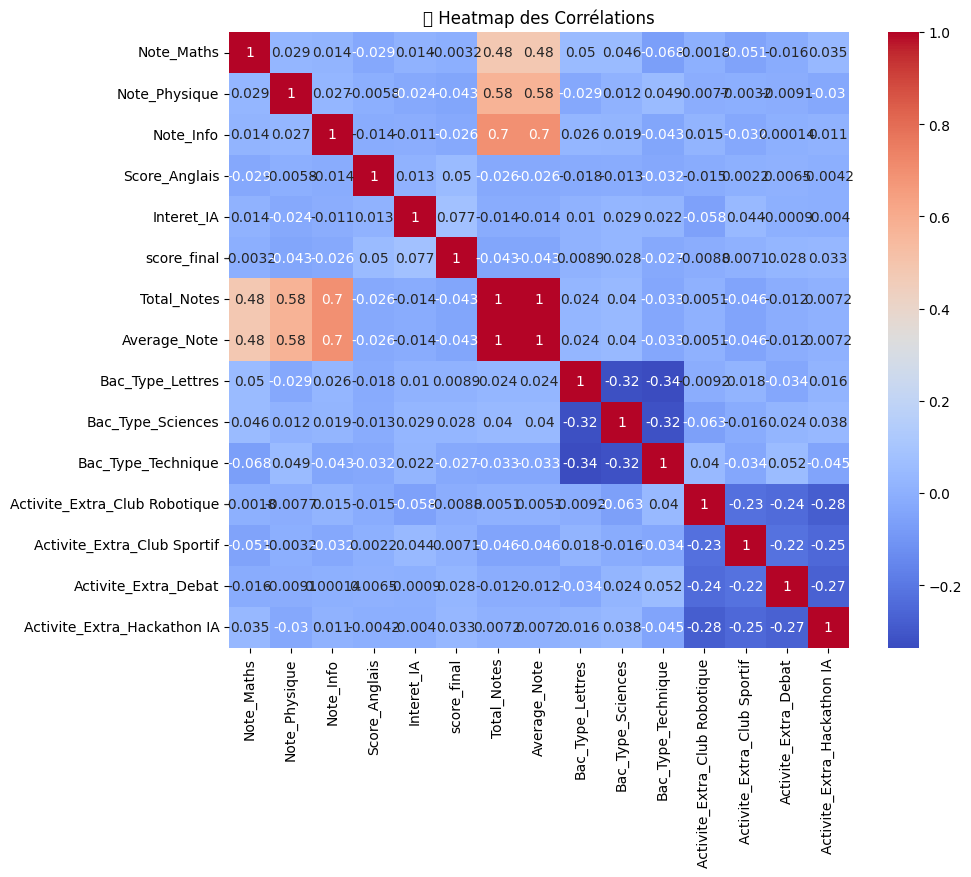


🚀 Entraînement : RandomForest
✅ MAE : 21.25
✅ R² : -9.49%

🚀 Entraînement : XGBoost
✅ MAE : 21.25
✅ R² : -14.41%

🚀 Entraînement : CatBoost
✅ MAE : 21.71
✅ R² : -16.18%

🚀 Entraînement : GradientBoosting
✅ MAE : 21.45
✅ R² : -13.57%

🚀 [Stacking] MAE : 20.76
✅ [Stacking] R² : -4.63%

📈 **Comparaison Finale des Modèles**
RandomForest: MAE = 21.25, R² = -9.49%
XGBoost: MAE = 21.25, R² = -14.41%
CatBoost: MAE = 21.71, R² = -16.18%
GradientBoosting: MAE = 21.45, R² = -13.57%
Stacking: MAE = 20.76, R² = -4.63%


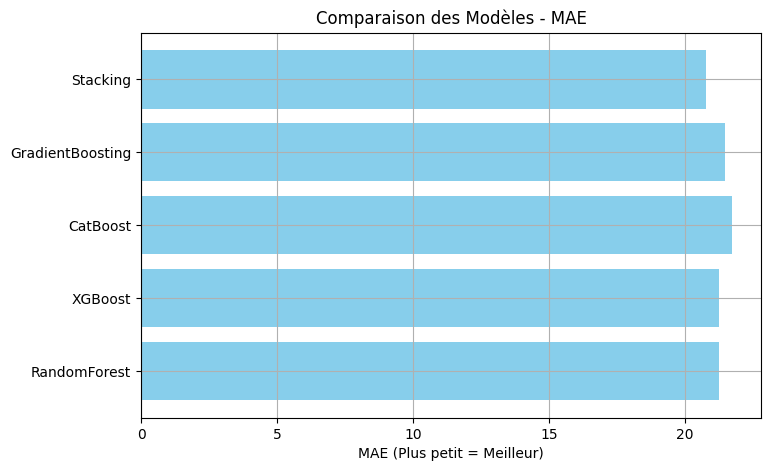

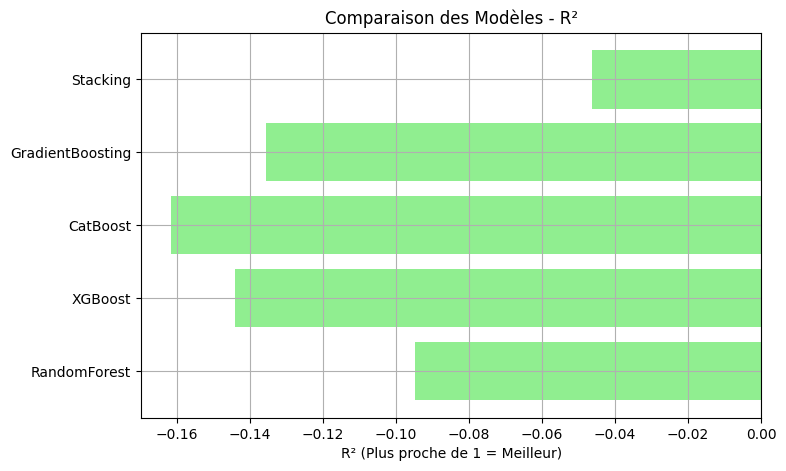

In [2]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 📥 Chargement des données
df = pd.read_csv(r'C:\Users\Acer\Downloads\MOCK_DATA_FINAL_COMPLET.csv')

# 🎯 Sélection des variables
features = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais', 'Bac_Type', 'Activite_Extra', 'Interet_IA']
target = 'score_final'
df_clean = df[features + [target]].dropna()

# 🔧 Feature Engineering
df_clean['Total_Notes'] = df_clean[['Note_Maths', 'Note_Physique', 'Note_Info']].sum(axis=1)
df_clean['Average_Note'] = df_clean['Total_Notes'] / 3

# 📚 Encodage et Normalisation
df_encoded = pd.get_dummies(df_clean, columns=['Bac_Type', 'Activite_Extra'], drop_first=True)
numerical_cols = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais', 'Total_Notes', 'Average_Note']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

X = df_encoded.drop(columns=[target])
y = df_encoded[target].values

# 📈 Analyse de Corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("📊 Heatmap des Corrélations")
plt.show()

# 📊 Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📐 Transformation de la cible (log1p + PowerTransformer)
power = PowerTransformer()
y_train_trans = power.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_trans = power.transform(y_test.reshape(-1, 1)).flatten()

# 📚 Modèles à tester
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🚀 Entraînement : {name}")
    model.fit(X_train, y_train_trans)
    y_pred_trans = model.predict(X_test)
    # 📥 Inverse transformation
    y_pred = power.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = (mae, r2)
    
    print(f"✅ MAE : {mae:.2f}")
    print(f"✅ R² : {r2:.2%}")

# 📚 Stacking Regressor
estimators = [
    ('rf', models["RandomForest"]),
    ('xgb', models["XGBoost"]),
    ('cat', models["CatBoost"]),
    ('gbr', models["GradientBoosting"])
]
stacking = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stacking.fit(X_train, y_train_trans)
y_pred_stack_trans = stacking.predict(X_test)
y_pred_stack = power.inverse_transform(y_pred_stack_trans.reshape(-1, 1)).flatten()

mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)
results["Stacking"] = (mae_stack, r2_stack)

print(f"\n🚀 [Stacking] MAE : {mae_stack:.2f}")
print(f"✅ [Stacking] R² : {r2_stack:.2%}")

# 📊 Résultats finaux
print("\n📈 **Comparaison Finale des Modèles**")
for model_name, (mae, r2) in results.items():
    print(f"{model_name}: MAE = {mae:.2f}, R² = {r2:.2%}")

# 📊 Affichage Graphique
plt.figure(figsize=(8, 5))
mae_values = [v[0] for v in results.values()]
r2_values = [v[1] for v in results.values()]
model_names = list(results.keys())

plt.barh(model_names, mae_values, color='skyblue')
plt.xlabel("MAE (Plus petit = Meilleur)")
plt.title("Comparaison des Modèles - MAE")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.barh(model_names, r2_values, color='lightgreen')
plt.xlabel("R² (Plus proche de 1 = Meilleur)")
plt.title("Comparaison des Modèles - R²")
plt.grid(True)
plt.show()


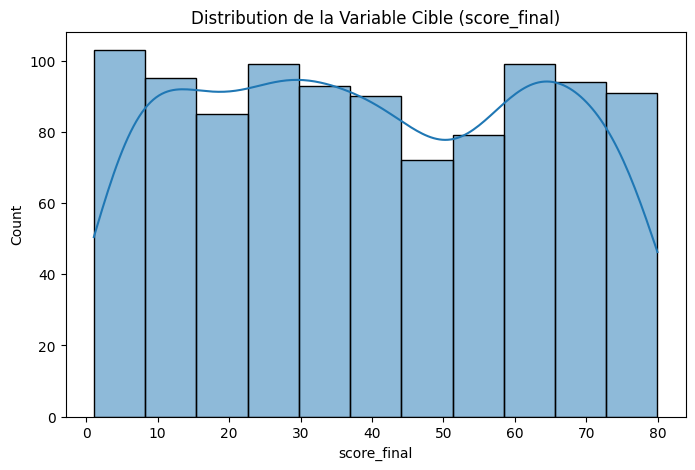

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['score_final'], kde=True)
plt.title("Distribution de la Variable Cible (score_final)")
plt.show()



🚀 Optimisation du modèle : RandomForest
✅ Meilleurs hyperparamètres : {'max_depth': 5, 'n_estimators': 100}
✅ MAE : 20.61
✅ R² : -0.11%

🚀 Optimisation du modèle : XGBoost
✅ Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
✅ MAE : 20.81
✅ R² : -2.27%

🚀 Optimisation du modèle : CatBoost
✅ Meilleurs hyperparamètres : {'depth': 4, 'iterations': 100, 'learning_rate': 0.05}
✅ MAE : 20.80
✅ R² : -1.50%

🚀 Optimisation du modèle : GradientBoosting
✅ Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
✅ MAE : 20.83
✅ R² : -2.50%

📈 **Comparaison Finale des Modèles après Tuning**
RandomForest: MAE = 20.61, R² = -0.11%
XGBoost: MAE = 20.81, R² = -2.27%
CatBoost: MAE = 20.80, R² = -1.50%
GradientBoosting: MAE = 20.83, R² = -2.50%


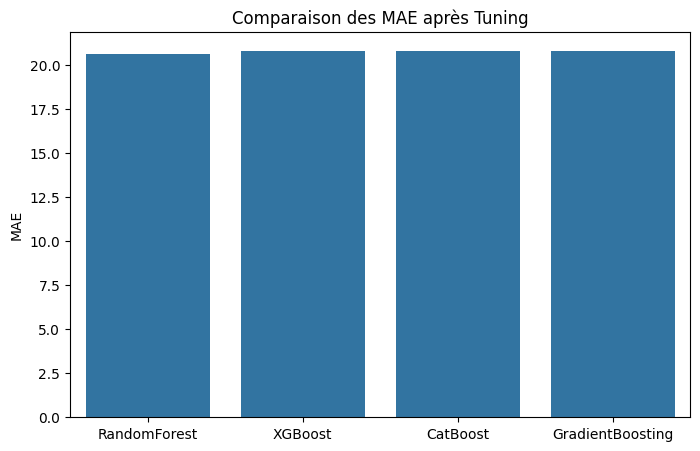

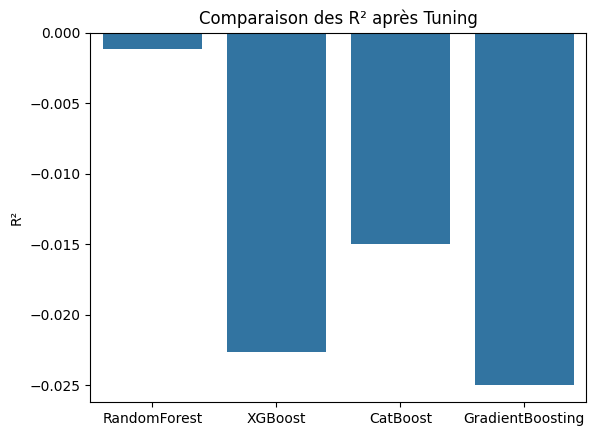

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")

# 1️⃣ Chargement des données
df = pd.read_csv(r'C:\Users\Acer\Downloads\MOCK_DATA_FINAL_COMPLET.csv')
features = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais', 'Bac_Type', 'Activite_Extra', 'Interet_IA']
target = 'score_final'
df_clean = df[features + [target]].dropna()

# 2️⃣ Encodage et Normalisation
df_encoded = pd.get_dummies(df_clean, columns=['Bac_Type', 'Activite_Extra'])
numerical_cols = ['Note_Maths', 'Note_Physique', 'Note_Info', 'Score_Anglais']
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Définition des modèles et des grilles de recherche
models_params = {
    "RandomForest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None]
    }),
    "XGBoost": (XGBRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.05, 0.1]
    }),
    "CatBoost": (CatBoostRegressor(verbose=0, random_state=42), {
        'iterations': [100, 200],
        'depth': [4, 6, 10],
        'learning_rate': [0.05, 0.1]
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.05, 0.1]
    })
}

results = {}

# 4️⃣ Entraînement avec GridSearchCV
for name, (model, params) in models_params.items():
    print(f"\n🚀 Optimisation du modèle : {name}")
    grid = GridSearchCV(model, params, cv=3, scoring='r2', n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = (mae, r2)
    print(f"✅ Meilleurs hyperparamètres : {grid.best_params_}")
    print(f"✅ MAE : {mae:.2f}")
    print(f"✅ R² : {r2:.2%}")

# 5️⃣ Résultats finaux
print("\n📈 **Comparaison Finale des Modèles après Tuning**")
for model_name, (mae, r2) in results.items():
    print(f"{model_name}: MAE = {mae:.2f}, R² = {r2:.2%}")

# 📊 Visualisation des résultats
plt.figure(figsize=(8, 5))
mae_values = [v[0] for v in results.values()]
r2_values = [v[1] for v in results.values()]
sns.barplot(x=list(results.keys()), y=mae_values)
plt.title("Comparaison des MAE après Tuning")
plt.ylabel("MAE")
plt.show()

sns.barplot(x=list(results.keys()), y=r2_values)
plt.title("Comparaison des R² après Tuning")
plt.ylabel("R²")
plt.show()

